In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [101]:
import sklearn

In [102]:
from sklearn.datasets import load_iris

In [103]:
iris=load_iris()

In [104]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [106]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
#iris.data

In [108]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['Name']=iris.target

In [109]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
x=iris.data
print(x.shape)

(150, 4)


### VIẾT CHƯƠNG TRÌNH SPLOM vẽ dữ liệu iris (4 chiều) Scatterplot Matrix

In [48]:
def SPLOM(x):
    n, p = x.shape
    fig, ax = plt.subplots(p, p, figsize=(10, 10))
    
    for i in range(p):
        for j in range(p):
            if i == j:
                ax[i, j].hist(x[:, i], bins=20, color='lightblue', edgecolor='black')
            else:
                ax[i, j].scatter(x[:, i], x[:, j], s=1)

    plt.show()


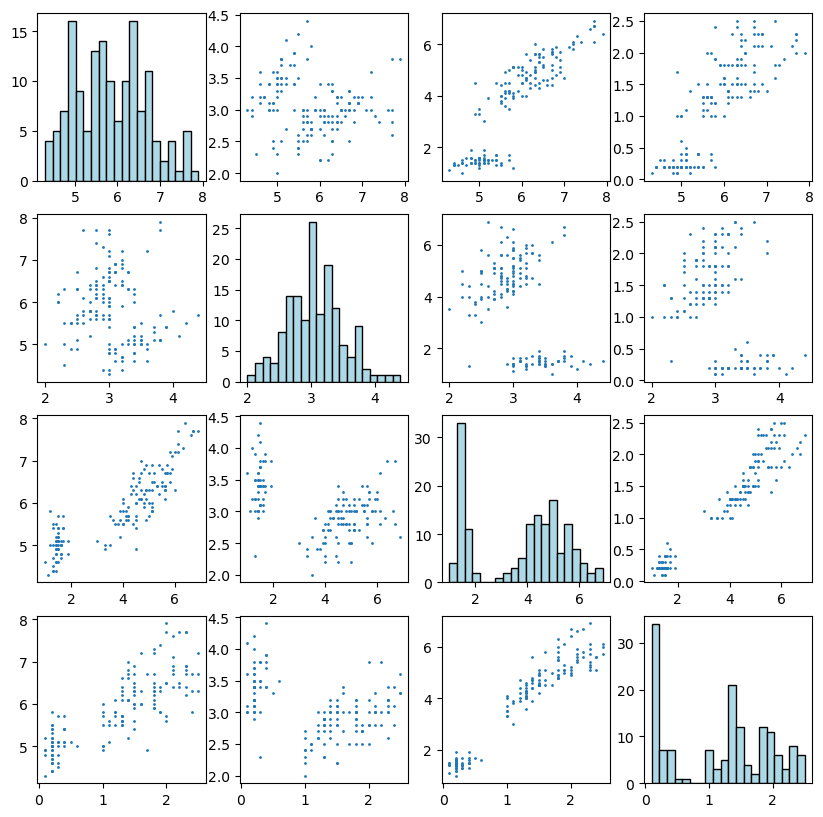

In [49]:
SPLOM(iris.data)

In [50]:
from sklearn.datasets import load_wine
wine=load_wine()

In [51]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

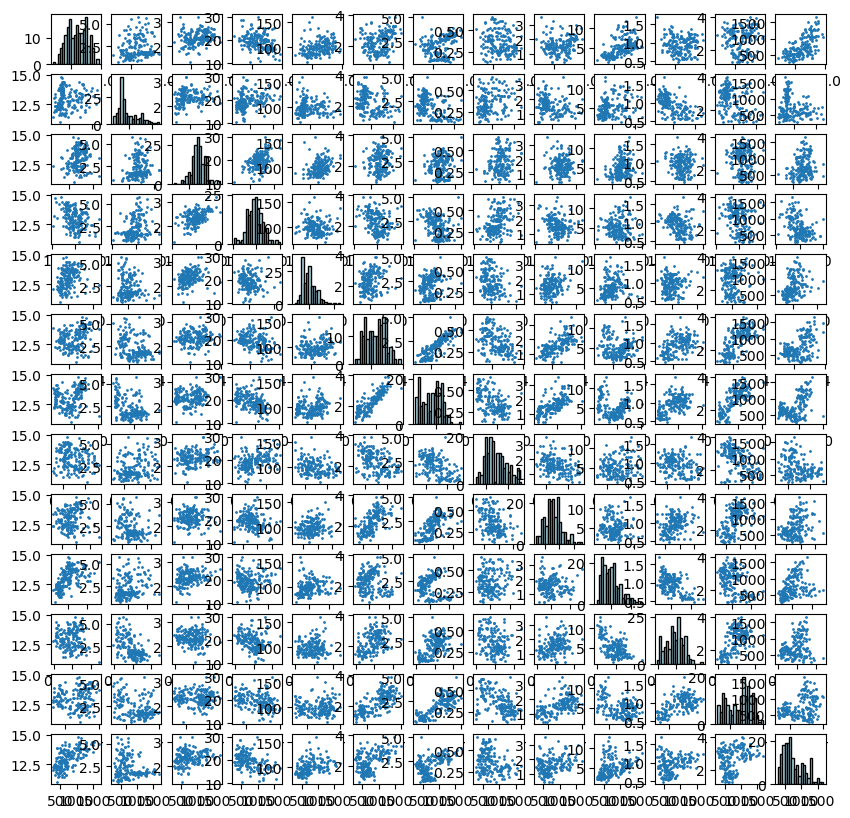

In [52]:
SPLOM(wine.data)

### VIẾT CHƯƠNG TRÌNH STARCOORDINATES vẽ dữ liệu iris (4 chiều) 

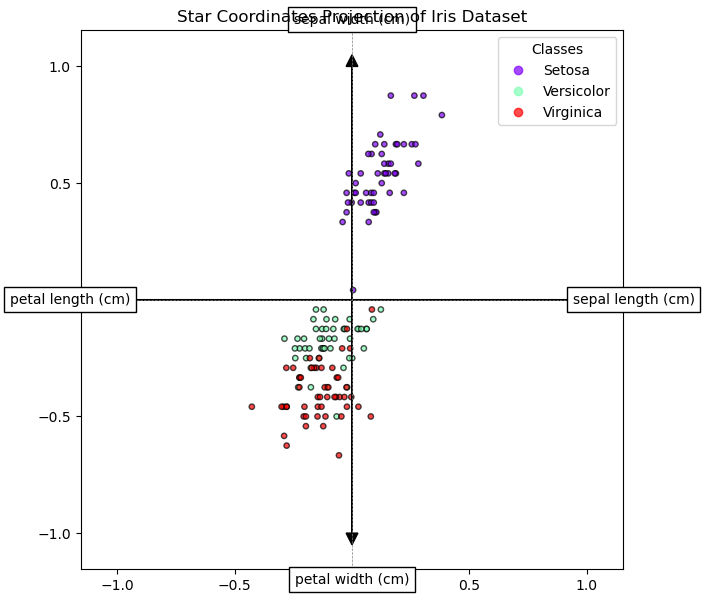

In [80]:
from sklearn import datasets

# 🔹 Load dữ liệu Iris và chuẩn hóa về [0,1]
iris = datasets.load_iris()
x = iris.data
x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))  # Min-Max Scaling
labels = iris.target  # Nhãn của từng điểm dữ liệu
feature_names = iris.feature_names  # Tên các đặc trưng

n, p = x.shape  # Số điểm và số chiều

# 🔹 Tạo hệ tọa độ sao
def Tinh_Hetoado(p):
    angles = np.linspace(0, 2 * np.pi, p, endpoint=False)
    v = np.c_[np.cos(angles), np.sin(angles)]
    return v

v = Tinh_Hetoado(p)  # Ma trận hệ tọa độ sao (p,2)

# 🔹 Chiếu dữ liệu lên hệ tọa độ sao
def Phepchieu(x, v):
    return x @ v  # Nhân ma trận (Nhanh hơn dùng vòng lặp)

y = Phepchieu(x, v)

# 🔹 Vẽ dữ liệu Iris với màu theo nhãn
plt.figure(figsize=(7, 7))
scatter = plt.scatter(y[:, 0], y[:, 1], c=labels, cmap="rainbow", s=15, edgecolors="black", alpha=0.7)

# 🔹 Vẽ trục tọa độ cho từng đặc trưng
for i, (x_, y_) in enumerate(v):
    plt.arrow(0, 0, x_, y_, head_width=0.05, head_length=0.05, fc="black", ec="black")
    plt.text(x_ * 1.2, y_ * 1.2, feature_names[i], ha="center", va="center", fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# 🔹 Thêm các trục chính
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# 🔹 Thêm legend cho các lớp
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes")

# 🔹 Hiển thị biểu đồ
plt.title("Star Coordinates Projection of Iris Dataset")
plt.show()

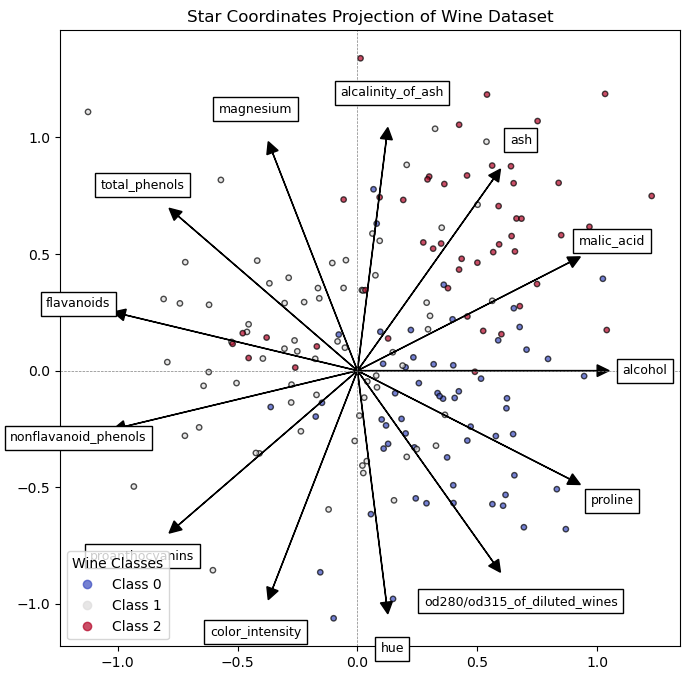

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

# 🔹 Load dữ liệu Wine
wine = datasets.load_wine()
x_wine = MinMaxScaler().fit_transform(wine.data)  # Chuẩn hóa dữ liệu Wine về [0,1]
y_wine_labels = wine.target  # Nhãn của dữ liệu Wine
feature_names = wine.feature_names  # Tên đặc trưng

# 🔹 Xác định số chiều p của dữ liệu
n, p = x_wine.shape

# 🔹 Tính hệ tọa độ Star Coordinates
def Tinh_Hetoado(p):
    v = np.zeros((p, 2))
    for i in range(p):
        v[i, 0] = np.cos(2 * np.pi / p * i)
        v[i, 1] = np.sin(2 * np.pi / p * i)
    return v

v = Tinh_Hetoado(p)

# 🔹 Chiếu dữ liệu Wine lên hệ tọa độ sao
def Phepchieu(x, v):
    return x.dot(v)

y_wine = Phepchieu(x_wine, v)

# 🔹 Vẽ biểu đồ Star Coordinates cho Wine
plt.figure(figsize=(8, 8))
scatter = plt.scatter(y_wine[:, 0], y_wine[:, 1], c=y_wine_labels, cmap="coolwarm", s=15, edgecolors="black", alpha=0.7, marker="o")

# 🔹 Vẽ trục tọa độ cho từng đặc trưng
for i, (x_, y_) in enumerate(v):
    plt.arrow(0, 0, x_, y_, head_width=0.05, head_length=0.05, fc="black", ec="black")
    plt.text(x_ * 1.2, y_ * 1.2, feature_names[i], ha="center", va="center", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

# 🔹 Thêm trục và legend
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'], title="Wine Classes")

# 🔹 Hiển thị biểu đồ
plt.title("Star Coordinates Projection of Wine Dataset")
plt.show()


## VE DUONG TRON

In [33]:
t=np.linspace(0,2*np.pi,101)
x=np.cos(t)
y=np.sin(t)

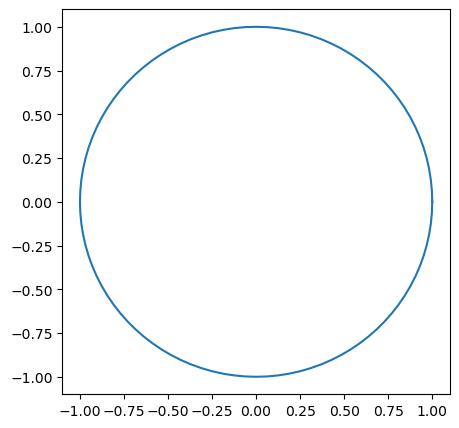

In [34]:
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.show()

# VE HE TOA DO HINH SAO

In [28]:
v.shape

(4, 2)

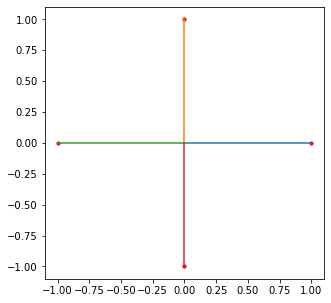

In [36]:
plt.figure(figsize=(5,5))
for i in range(v.shape[0]):
    plt.plot([0,v[i,0]],[0,v[i,1]])
    plt.scatter(v[i,0],v[i,1],s=10,c='red')
plt.show()

# RADVIZ

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

def radviz_custom(df, class_column, title="Radial Visualization (RadViz)"):                      
    iris = datasets.load_iris() 
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names) 
    df_iris["target"] = iris.target
   
    
    # 🔹 Chuẩn hóa dữ liệu về [0,1] (bỏ cột nhãn)
    scaler = MinMaxScaler()
    features = df.drop(columns=[class_column])
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # 🔹 Số lượng đặc trưng
    p = features.shape[1]

    # 🔹 Tính tọa độ của các trục trên vòng tròn đơn vị
    angles = np.linspace(0, 2 * np.pi, p, endpoint=False)
    feature_positions = np.c_[np.cos(angles), np.sin(angles)]

    # 🔹 Tính tọa độ của từng điểm dữ liệu
    X = features.values
    numerator = np.dot(X, feature_positions)
    denominator = np.sum(X, axis=1, keepdims=True) + 1e-6  # Tránh chia cho 0
    coords = numerator / denominator  # Tọa độ điểm dữ liệu

    # 🔹 Vẽ biểu đồ
    plt.figure(figsize=(8, 8))
    plt.scatter(coords[:, 0], coords[:, 1], c=df[class_column], cmap="coolwarm", edgecolors="k", alpha=0.7)

    # 🔹 Vẽ vòng tròn đơn vị
    circle = plt.Circle((0, 0), 1, color="black", fill=False, linewidth=2)
    plt.gca().add_patch(circle)

  

    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()




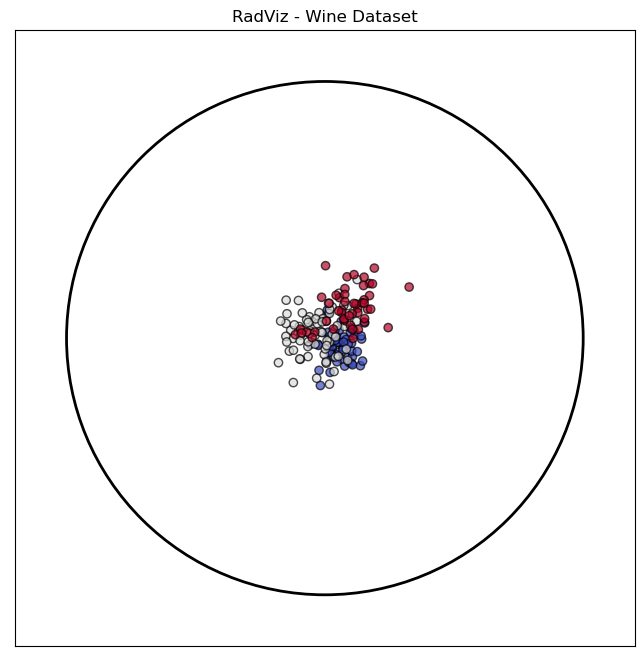

In [98]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["target"] = wine.target

radviz_custom(df_wine, "target", "RadViz - Wine Dataset")


### MDS

In [96]:
from sklearn.manifold import MDS

In [98]:
mds = MDS(n_components=2)
y = mds.fit_transform(x)

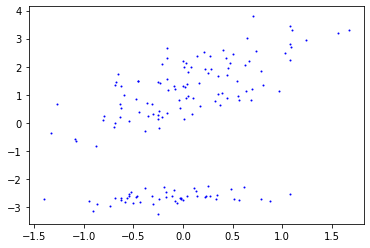

In [99]:
plt.scatter(y[:,0],y[:,1],c='blue',s=1)
plt.show()

## HE TOA DO SONG SONG (PARALLEL COORDINATES)

In [121]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [122]:
print(df_wine.head())  

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [127]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(df_wine)

In [128]:
n,p=x_scale.shape
print(n,p)

178 14


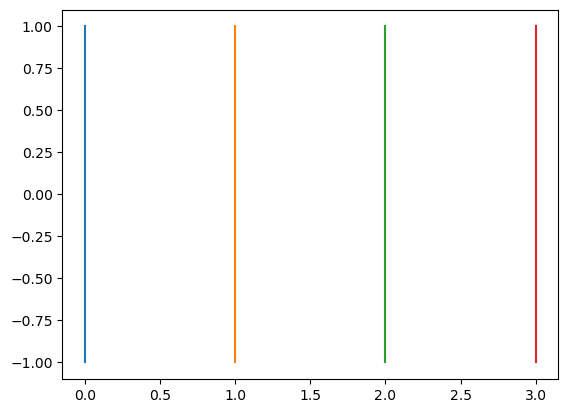

In [129]:
plt.plot([0,0],[-1,1])
plt.plot([1,1],[-1,1])
plt.plot([2,2],[-1,1])
plt.plot([3,3],[-1,1])

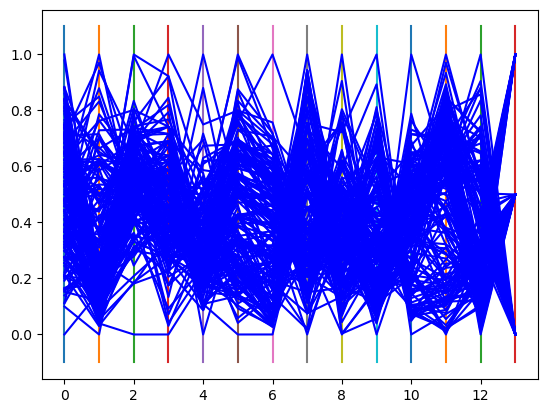

In [130]:
for i in range(p):
    plt.plot([i,i],[-0.1,1.1])
for i in range(n): 
    plt.plot(np.linspace(0,p-1,p),x_scale[i,:],c='blue')
plt.show()

In [134]:
x=iris.data
print(x.shape)

(150, 4)


In [135]:
x.min()

0.1

In [136]:
x.max()

7.9

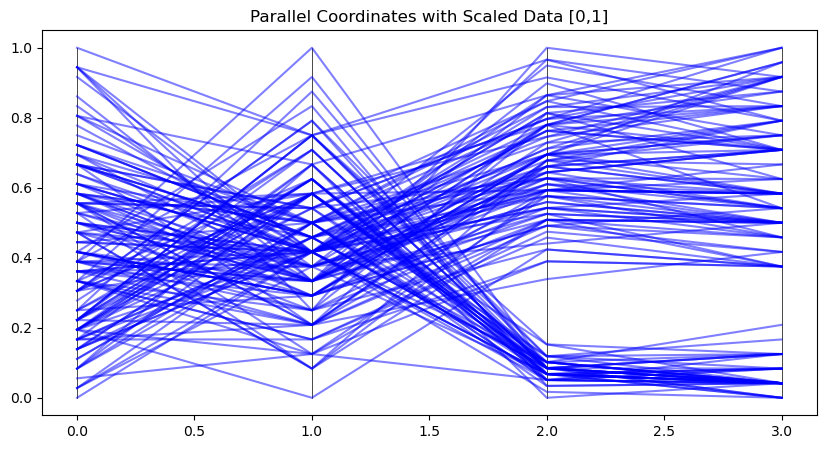

In [141]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


p = x_scaled.shape[1]  # Số lượng đặc trưng
n = x_scaled.shape[0] # Số lượng mẫu

plt.figure(figsize=(10, 5))

# 🔹 Vẽ các đường trục song song
for i in range(p):
    plt.plot([i, i], [0, 1], c="black", lw=0.5)  # Giới hạn từ 0 đến 1

# 🔹 Vẽ từng dòng dữ liệu
for i in range(n):
    plt.plot(np.linspace(0, p-1, p), x_scaled[i, :], c='blue', alpha=0.5)

plt.title("Parallel Coordinates with Scaled Data [0,1]")
plt.show()

In [132]:
print(f"p: {p}")

p: 14


## Andrews Curve

In [143]:
from sklearn.preprocessing import MinMaxScaler

def andrews_curve_custom(df, class_column, title="Andrews Curve"):
   
    # 🔹 Chuẩn hóa dữ liệu về [0,1] để tránh giá trị quá lớn
    scaler = MinMaxScaler()
    features = df.drop(columns=[class_column])
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    
    # 🔹 Lấy nhãn (target)
    labels = df[class_column].values
    unique_labels = np.unique(labels)
    # 🔹 Xác định số lượng biến
    p = features.shape[1]

    # 🔹 Hàm tính Andrews Curve
    def andrews_function(x, t):
        result = x[0] / np.sqrt(2)  # Hệ số đầu tiên
        for i in range(1, p):
            if i % 2 == 0:
                result += x[i] * np.sin((i // 2) * t)
            else:
                result += x[i] * np.cos((i // 2) * t)
        return result

    # 🔹 Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    t_values = np.linspace(-np.pi, np.pi, 200)
    
    # 🔹 Vẽ từng đường của dữ liệu
    for i in range(len(features)):
        curve = [andrews_function(features.iloc[i].values, t) for t in t_values]
        plt.plot(t_values, curve, alpha=0.5, label=str(labels[i]) if labels[i] in unique_labels else "")

    # 🔹 Chỉnh đồ họa
    plt.title(title)
    plt.xlabel("t (biến thời gian giả lập)")
    plt.ylabel("f(t) (Giá trị ánh xạ)")
    plt.legend(title="Class", labels=unique_labels)
    plt.show()

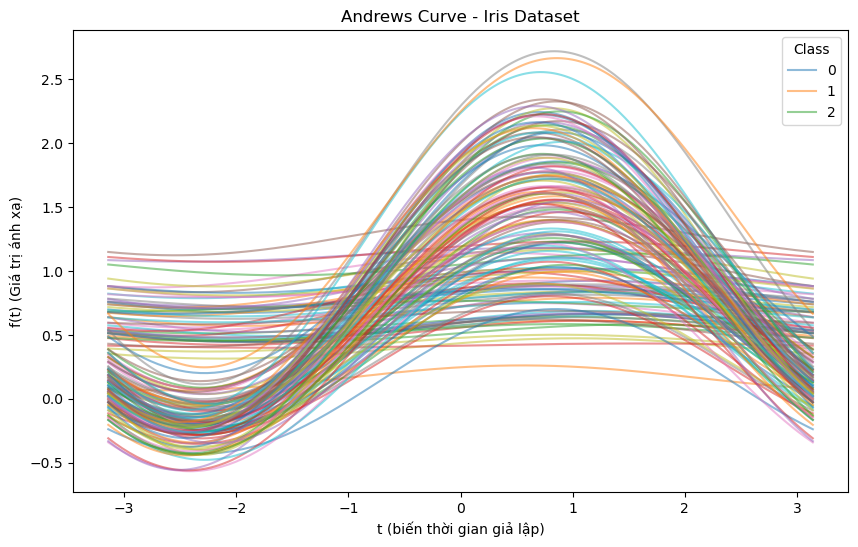

In [145]:
"""
    Vẽ Andrews Curve cho một tập dữ liệu bất kỳ.

    Parameters:
    - df: DataFrame chứa dữ liệu (các cột đặc trưng và cột nhãn)
    - class_column: Tên cột nhãn trong df
    - title: Tiêu đề của biểu đồ
    """
andrews_curve_custom(df_iris, "target", "Andrews Curve - Iris Dataset")

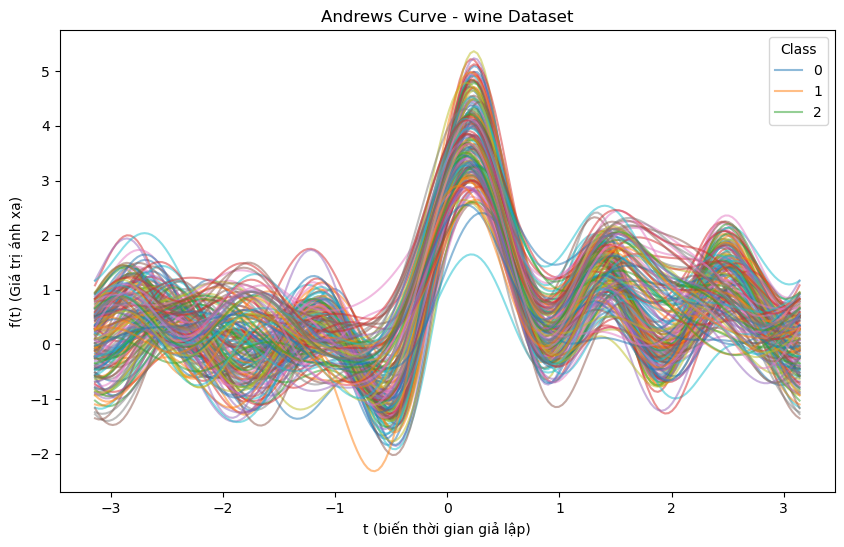

In [146]:
andrews_curve_custom(df_wine, "target", "Andrews Curve - wine Dataset")